In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.random.seed = 5

In [3]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"

df = pd.read_csv(uri)

df.head(5)

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [4]:
col_name = {
    'unfinished': 'nao_finalizado',
    'price': 'preco',
    'expected_hours': 'hora_esperada'
}

df = df.rename(columns=col_name)

troca = {
    0:1,
    1:0
}

df['finalizado'] = df.nao_finalizado.map(troca)

df.head(5)

,nao_finalizado,hora_esperada,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


<Axes: xlabel='hora_esperada', ylabel='preco'>

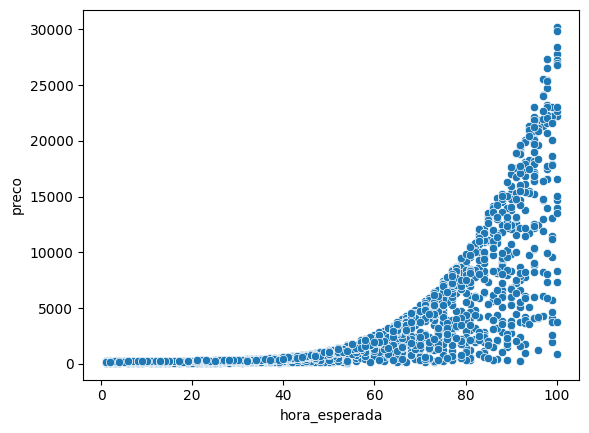

In [5]:
sns.scatterplot(x='hora_esperada', y='preco', data=df)

<Axes: xlabel='hora_esperada', ylabel='preco'>

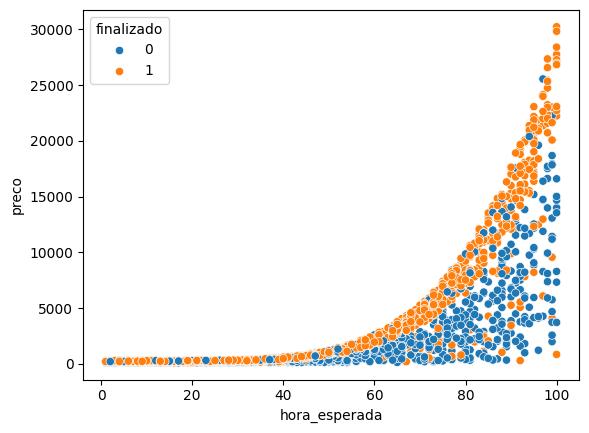

In [6]:
sns.scatterplot(x='hora_esperada', y='preco', data=df, hue='finalizado')

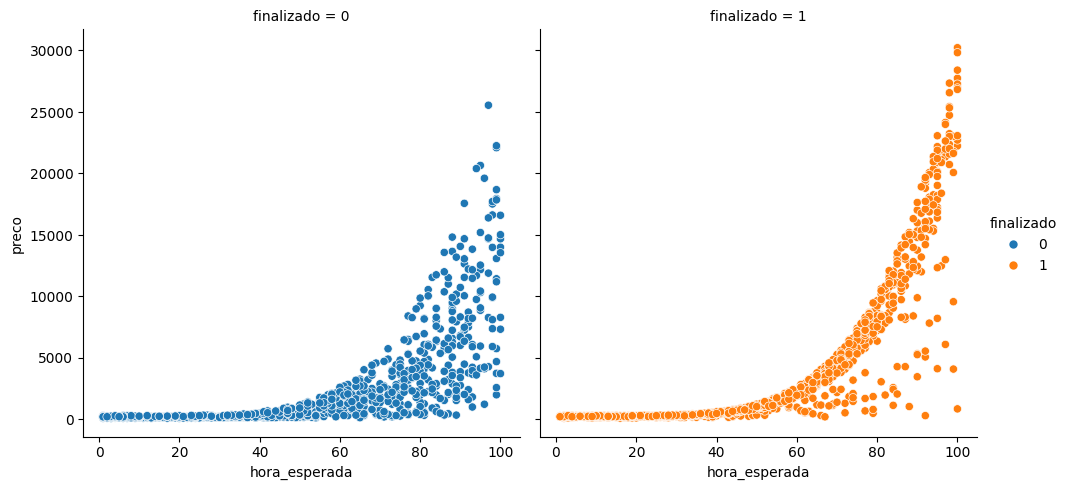

In [7]:
sns.relplot(x='hora_esperada', y='preco', data=df,col='finalizado', hue='finalizado')

In [10]:
X = df[['hora_esperada', 'preco']]
y = df['finalizado']

treino_x, teste_x, treino_y, teste_y = train_test_split(X, y, test_size=0.25, stratify=y)

In [11]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

model = LinearSVC()

model.fit(treino_x, treino_y)

previsoes = model.predict(teste_x)

# Taxa de acerto.
accuracy_score(teste_y, previsoes)

0.5851851851851851

<Axes: xlabel='hora_esperada', ylabel='preco'>

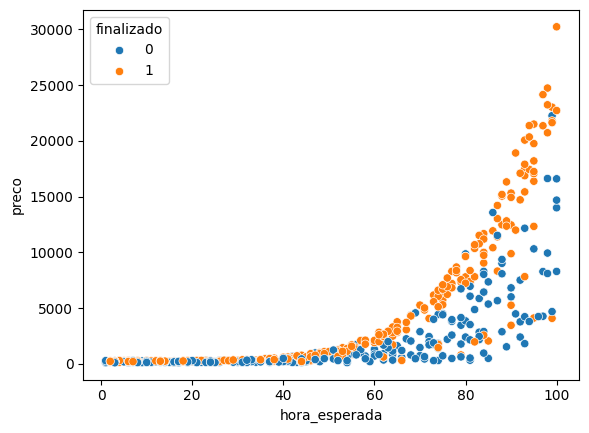

In [12]:
sns.scatterplot(x='hora_esperada', y='preco', hue=teste_y, data=teste_x)

In [13]:
x_min = teste_x.hora_esperada.min()
x_max = teste_x.hora_esperada.max()

y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixel = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixel)  
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixel)  

xx, yy = np.meshgrid(eixo_x, eixo_y)

pontos = np.c_[xx.ravel(), yy.ravel()]
pontos[:10]

array([[  1.  , 100.  ],
       [  1.99, 100.  ],
       [  2.98, 100.  ],
       [  3.97, 100.  ],
       [  4.96, 100.  ],
       [  5.95, 100.  ],
       [  6.94, 100.  ],
       [  7.93, 100.  ],
       [  8.92, 100.  ],
       [  9.91, 100.  ]])

In [14]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z

c:\Users\renat\Documents\python\Machine Learning classificação com SKLearn\myvenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

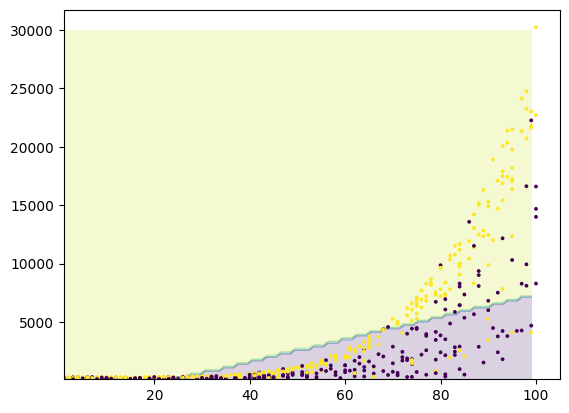

In [15]:
# Decision Boundary

plt.contourf(xx, yy, Z, alpha=0.2)

plt.scatter(teste_x.hora_esperada, teste_x.preco, c=teste_y, s=3)